## Salazar, Mart Anthony A.
### BSIT-3C
### Activity 7

In [1]:
# Descriptive Analytics on file 'PlantExperiment.xlsx'
# Work on Variable: Length
# Load necessary packages
import pandas as pd
# Load dataset to variable df
df = pd.read_excel('PlantExperiment.xlsx')
# Check for missing cases
df.isnull().values.any()

False

In [2]:
# Check structure of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16 non-null     int64  
 1   Group       16 non-null     object 
 2   Weight      16 non-null     float64
 3   Length      16 non-null     float64
 4   Stalk       16 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 768.0+ bytes


In [5]:
# Exploratory Data Analysis
#Conduct Normality testing
# Null Hypothesis: The distribution is approximately normal
import scipy.stats as stats

Ltx = df[(df['Group'] == 'Treatment')].Length
Lcon = df[(df['Group'] == 'Control')].Length
stats.anderson(Ltx, dist='norm'), stats.anderson(Lcon, dist='norm')

(AndersonResult(statistic=0.22757336736482614, critical_values=array([0.519, 0.591, 0.709, 0.827, 0.984]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])),
 AndersonResult(statistic=0.14108651046624665, critical_values=array([0.519, 0.591, 0.709, 0.827, 0.984]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])))

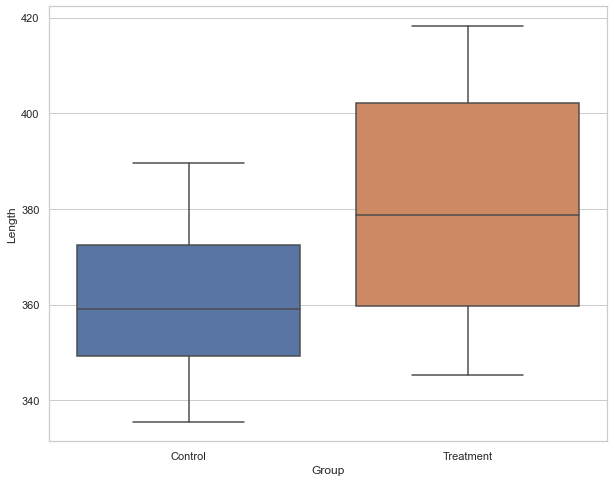

In [6]:
# Data Visualization - Boxplot
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
sns.set(style = "whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x = 'Group', y = 'Length', data=df, orient="v")

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


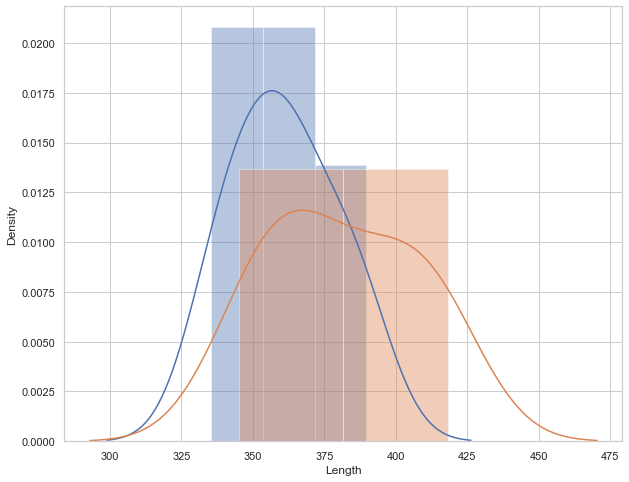

In [7]:
# Data Visualization - Distribution plot
sns.set(style = "whitegrid")
plt.figure(figsize=(10,8))
bx = sns.distplot(df[df["Group"]== "Control"].Length)
cx = sns.distplot(df[df["Group"]== "Treatment"].Length)

In [9]:
# Conduct Test for Homogeneity
# Null Hypothesis: The variances are Homogenous
stats.levene(Ltx, Lcon, center='mean') # I used mean because the distribution is moderate-tailed

LeveneResult(statistic=1.9530606918820244, pvalue=0.18401146270747246)

In [10]:
#Descriptive Analysis
Desc = df['Length'].groupby(df['Group']).describe()
Desc.to_csv("DescRes2.csv")

In [11]:
#Inferential Analysis
# Condition: Distributions Approximately Normal | Variance is not Homogenous
import researchpy as rp
rp.ttest(Ltx, Lcon, equal_variances= True, paired= False)

C:\Users\lenovo\anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable     N        Mean         SD        SE   95% Conf.    Interval
 0    Length   8.0  381.250000  26.369547  9.323043  359.204507  403.295493
 1    Length   8.0  360.933750  18.492847  6.538209  345.473343  376.394157
 2  combined  16.0  371.091875  24.375355  6.093839  358.103165  384.080585,
                 Independent t-test  results
 0  Difference (Length - Length) =   20.3163
 1            Degrees of freedom =   14.0000
 2                             t =    1.7841
 3         Two side test p value =    0.0961
 4        Difference < 0 p value =    0.9520
 5        Difference > 0 p value =    0.0480
 6                     Cohen's d =    0.8921
 7                     Hedge's g =    0.8434
 8                Glass's delta1 =    0.7704
 9              Point-Biserial r =    0.4304)